In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b334c049-1a30-4e41-840d-e2dab82d36f5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-03T23:46:54.782Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 9947}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11666, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

C:\Users\Bharath\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11666,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974921e+07,1.974921e+07,False,NaN,1,NaN,NaN,None,2024-09-03T23:45:00.000Z,57726.050696,2.649010e+10,-2.3516,-0.253324,-2.411915,-3.196342,-1.144925,1.653495,-18.785626,1.140044e+12,56.4440,1.212247e+12,None,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
1,1027,Ethereum,ETH,ethereum,9260,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203104e+08,1.203104e+08,True,NaN,2,NaN,NaN,None,2024-09-03T23:44:00.000Z,2447.407141,1.122342e+10,-10.5651,-0.397194,-3.532007,-0.703514,-9.459345,-18.199625,-36.714953,2.944486e+11,14.5783,2.944486e+11,None,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
2,825,Tether USDt,USDT,tether,96255,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181418e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-09-03T23:44:00.000Z,0.999729,4.294504e+10,-6.1333,-0.006753,-0.024839,-0.077063,0.007908,-0.026190,-0.029489,1.181098e+11,5.8489,1.202193e+11,None,2024-09-03T23:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-03 23:46:55.867830
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459348e+08,1.459348e+08,False,NaN,4,NaN,NaN,None,2024-09-03T23:44:00.000Z,520.858992,1.557427e+09,-5.7091,-0.599668,-1.119790,-2.818339,4.413202,4.324909,-25.382034,7.601144e+10,3.7640,7.601144e+10,None,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667002e+08,5.836671e+08,True,NaN,5,NaN,NaN,None,2024-09-03T23:44:00.000Z,128.190264,1.742647e+09,-17.0064,-1.074500,-5.151649,-13.203935,-7.571038,-4.928335,-26.128663,5.982642e+10,2.9625,7.482044e+10,None,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
5,3408,USDC,USDC,usd-coin,21835,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.465423e+10,3.465423e+10,False,NaN,6,NaN,NaN,None,2024-09-03T23:44:00.000Z,0.999901,4.823812e+09,8.5222,-0.009078,-0.015212,-0.033711,-0.001181,-0.003664,-0.010531,3.465079e+10,1.7159,3.465079e+10,None,2024-09-03T23:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-03 23:46:55.867830
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-03T23:45:00.000Z,0.560108,8.108778e+08,-3.0991,-0.686982,-1.356591,-1.676708,6.489393,31.231485,6.603314,3.150694e+10,1.5603,5.601079e+10,None,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458091e+11,1.458091e+11,True,NaN,8,NaN,NaN,None,2024-09-03T23:45:00.000Z,0.097032,3.912167e+08,-16.1486,-0.638123,-2.136334,-2.202880,-6.910189,-8.789047,-40.602430,1.414815e+10,0.7006,1.414815e+10,None,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
8,1958,TRON,TRX,tron,1021,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b334c049-1a30-4e41-840d-e2dab82d36f5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'C:\Users\Bharath\OneDrive\Documents\Docs\DS\Python\APT.csv'):
        df.to_csv(r'C:\Users\Bharath\OneDrive\Documents\Docs\DS\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Bharath\OneDrive\Documents\Docs\DS\Python\API.csv', mode='a', header=False)
    
    

In [7]:
import os
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print("API Runner completed run successfully!")
    sleep(60)
exit()

C:\Users\Bharath\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Bharath\AppData\Local\Temp\ipykernel_34332\1559503386.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed run successfully!


C:\Users\Bharath\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Bharath\AppData\Local\Temp\ipykernel_34332\1559503386.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed run successfully!


KeyboardInterrupt: 

In [8]:
df10 = pd.read_csv(r'C:\Users\Bharath\OneDrive\Documents\Docs\DS\Python\API.csv')
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11666,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974921e+07,1.974921e+07,False,NaN,1,NaN,NaN,NaN,2024-09-03T23:45:00.000Z,57726.050696,2.649010e+10,-2.3516,-0.253324,-2.411915,-3.196342,-1.144925,1.653495,-18.785626,1.140044e+12,56.4440,1.212247e+12,NaN,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
1,1,1027,Ethereum,ETH,ethereum,9260,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203104e+08,1.203104e+08,True,NaN,2,NaN,NaN,NaN,2024-09-03T23:44:00.000Z,2447.407141,1.122342e+10,-10.5651,-0.397194,-3.532007,-0.703514,-9.459345,-18.199625,-36.714953,2.944486e+11,14.5783,2.944486e+11,NaN,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
2,2,825,Tether USDt,USDT,tether,96255,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.181418e+11,1.202519e+11,True,NaN,3,NaN,NaN,NaN,2024-09-03T23:44:00.000Z,0.999729,4.294504e+10,-6.1333,-0.006753,-0.024839,-0.077063,0.007908,-0.026190,-0.029489,1.181098e+11,5.8489,1.202193e+11,NaN,2024-09-03T23:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-03 23:46:55.867830
3,3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459348e+08,1.459348e+08,False,NaN,4,NaN,NaN,NaN,2024-09-03T23:44:00.000Z,520.858992,1.557427e+09,-5.7091,-0.599668,-1.119790,-2.818339,4.413202,4.324909,-25.382034,7.601144e+10,3.7640,7.601144e+10,NaN,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
4,4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.667002e+08,5.836671e+08,True,NaN,5,NaN,NaN,NaN,2024-09-03T23:44:00.000Z,128.190264,1.742647e+09,-17.0064,-1.074500,-5.151649,-13.203935,-7.571038,-4.928335,-26.128663,5.982642e+10,2.9625,7.482044e+10,NaN,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
5,5,3408,USDC,USDC,usd-coin,21835,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.465423e+10,3.465423e+10,False,NaN,6,NaN,NaN,NaN,2024-09-03T23:44:00.000Z,0.999901,4.823812e+09,8.5222,-0.009078,-0.015212,-0.033711,-0.001181,-0.003664,-0.010531,3.465079e+10,1.7159,3.465079e+10,NaN,2024-09-03T23:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-03 23:46:55.867830
6,6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,NaN,2024-09-03T23:45:00.000Z,0.560108,8.108778e+08,-3.0991,-0.686982,-1.356591,-1.676708,6.489393,31.231485,6.603314,3.150694e+10,1.5603,5.601079e+10,NaN,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
7,7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.458091e+11,1.458091e+11,True,NaN,8,NaN,NaN,NaN,2024-09-03T23:45:00.000Z,0.097032,3.912167e+08,-16.1486,-0.638123,-2.136334,-2.202880,-6.910189,-8.789047,-40.602430,1.414815e+10,0.7006,1.414815e+10,NaN,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
8,8,1958,TRON,TRX,tron,1021,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'la

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11666,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19749209.00000,19749209.00000,False,NaN,1,NaN,NaN,None,2024-09-03T23:45:00.000Z,57726.05070,26490097218.34374,-2.35160,-0.25332,-2.41191,-3.19634,-1.14492,1.65350,-18.78563,1140043839942.62744,56.44400,1212247064618.89990,None,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
1,1027,Ethereum,ETH,ethereum,9260,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120310443.23493,120310443.23493,True,NaN,2,NaN,NaN,None,2024-09-03T23:44:00.000Z,2447.40714,11223419690.51712,-10.56510,-0.39719,-3.53201,-0.70351,-9.45935,-18.19963,-36.71495,294448637957.39648,14.57830,294448637957.40002,None,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
2,825,Tether USDt,USDT,tether,96255,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118141801841.45212,120251893183.66805,True,NaN,3,NaN,NaN,None,2024-09-03T23:44:00.000Z,0.99973,42945036068.80922,-6.13330,-0.00675,-0.02484,-0.07706,0.00791,-0.02619,-0.02949,118109774693.76091,5.84890,120219294009.77000,None,2024-09-03T23:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-03 23:46:55.867830
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145934774.92627,145934774.92627,False,NaN,4,NaN,NaN,None,2024-09-03T23:44:00.000Z,520.85899,1557427087.68647,-5.70910,-0.59967,-1.11979,-2.81834,4.41320,4.32491,-25.38203,76011439741.71701,3.76400,76011439741.72000,None,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466700218.87998,583667105.83045,True,NaN,5,NaN,NaN,None,2024-09-03T23:44:00.000Z,128.19026,1742647035.48985,-17.00640,-1.07450,-5.15165,-13.20394,-7.57104,-4.92834,-26.12866,59826424285.90517,2.96250,74820440408.06000,None,2024-09-03T23:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
5,3408,USDC,USDC,usd-coin,21835,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34654226759.50620,34654226759.50620,False,NaN,6,NaN,NaN,None,2024-09-03T23:44:00.000Z,0.99990,4823811728.45046,8.52220,-0.00908,-0.01521,-0.03371,-0.00118,-0.00366,-0.01053,34650792616.39884,1.71590,34650792616.40000,None,2024-09-03T23:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-03 23:46:55.867830
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56251561168.00000,99987294444.00000,False,NaN,7,NaN,NaN,None,2024-09-03T23:45:00.000Z,0.56011,810877762.21257,-3.09910,-0.68698,-1.35659,-1.67671,6.48939,31.23148,6.60331,31506944450.09209,1.56030,56010791160.08000,None,2024-09-03T23:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 23:46:55.867830
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145809056383.70526,145809056383.70526,True,NaN,8,NaN,NaN,None,2024-09-03T23:45:00.000Z,0.09703,391216685.66556,-16.14860,-0.63812,-2.13633,-2.20288,-6.91019,-8.78905,-40.60243,14148146232.44830,0.70060,14148146232.45000,None,2024-09-03T23:45:

In [12]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.27732,-2.42480,-3.22624,-1.11087,1.63825,-18.77931
Ethereum,-0.39411,-3.54271,-0.69152,-9.42151,-18.20224,-36.70360
Tether USDt,-0.00869,-0.02405,-0.07650,-0.00346,-0.02686,-0.03176
BNB,-0.58908,-1.13377,-2.81432,4.40801,4.33494,-25.37577
Solana,-1.06731,-5.13657,-13.16760,-7.50285,-4.90941,-26.10740
USDC,-0.00944,-0.01286,-0.03078,-0.01241,-0.00484,-0.01164
XRP,-0.67481,-1.34651,-1.65101,6.49725,31.26719,6.60894
Dogecoin,-0.62244,-2.12259,-2.19042,-6.87319,-8.75708,-40.57397
TRON,-0.11716,-2.20884,-4.69603,19.28556,18.61887,31.46843


In [13]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.27732
              quote.USD.percent_change_24h    -2.42480
              quote.USD.percent_change_7d     -3.22624
              quote.USD.percent_change_30d    -1.11087
              quote.USD.percent_change_60d     1.63825
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h    -3.93478
              quote.USD.percent_change_7d     -4.32021
              quote.USD.percent_change_30d    -6.49682
              quote.USD.percent_change_60d    -4.83928
              quote.USD.percent_change_90d   -37.17743
Length: 90, dtype: float64

In [14]:
type(df3)

pandas.core.frame.DataFrame

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.27732
             quote.USD.percent_change_24h  -2.42480
             quote.USD.percent_change_7d   -3.22624
             quote.USD.percent_change_30d  -1.11087
             quote.USD.percent_change_60d   1.63825
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h  -3.93478
             quote.USD.percent_change_7d   -4.32021
             quote.USD.percent_change_30d  -6.49682
             quote.USD.percent_change_60d  -4.83928
             quote.USD.percent_change_90d -37.17743

[90 rows x 1 columns]

In [19]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.27732
1,Bitcoin,quote.USD.percent_change_24h,-2.42480
2,Bitcoin,quote.USD.percent_change_7d,-3.22624
3,Bitcoin,quote.USD.percent_change_30d,-1.11087
4,Bitcoin,quote.USD.percent_change_60d,1.63825
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-3.93478
86,Bitcoin Cash,quote.USD.percent_change_7d,-4.32021
87,Bitcoin Cash,quote.USD.percent_change_30d,-6.49682
88,Bitcoin Cash,quote.USD.percent_change_60d,-4.83928


In [21]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.27732
1,Bitcoin,quote.USD.percent_change_24h,-2.42480
2,Bitcoin,quote.USD.percent_change_7d,-3.22624
3,Bitcoin,quote.USD.percent_change_30d,-1.11087
4,Bitcoin,quote.USD.percent_change_60d,1.63825
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-3.93478
86,Bitcoin Cash,quote.USD.percent_change_7d,-4.32021
87,Bitcoin Cash,quote.USD.percent_change_30d,-6.49682
88,Bitcoin Cash,quote.USD.percent_change_60d,-4.83928


In [30]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.27732
1,Bitcoin,24h,-2.42480
2,Bitcoin,7d,-3.22624
3,Bitcoin,30d,-1.11087
4,Bitcoin,60d,1.63825
...,...,...,...
85,Bitcoin Cash,24h,-3.93478
86,Bitcoin Cash,7d,-4.32021
87,Bitcoin Cash,30d,-6.49682
88,Bitcoin Cash,60d,-4.83928


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

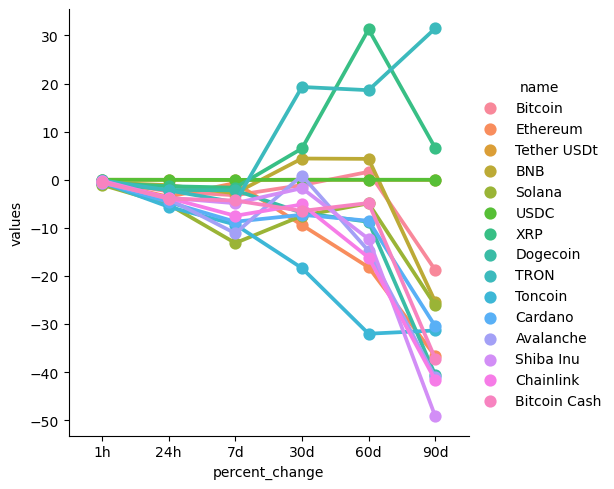

In [32]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [38]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,57726.05070,2024-09-03 23:46:55.867830
0,Bitcoin,57726.05070,2024-09-03 23:46:56.079869
0,Bitcoin,57700.97364,2024-09-03 23:47:56.350486


In [41]:
# sns.set_theme(style = 'darkgrid')

# sns.lineplot(x='timestamp',y = 'quote.USD.price', data=df8)